In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

#coisas para fazer o SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

#coisas para testar
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#separando em treino e teste

x=df.iloc[:,0:12]
y=df.iloc[:,12]

x_treino,x_teste,y_treino,y_teste=train_test_split(x,y,random_state=0,test_size=0.2)

In [4]:
#fazendo tudo em escala 

scaler = StandardScaler().fit(x_treino)
x_treino=scaler.transform(x_treino)
x_teste=scaler.transform(x_teste)

In [5]:
#treinando a máquina 

clf=svm.SVC(kernel='sigmoid',C=10)
clf.fit(x_treino,y_treino)

#testando o modelo

y_pred=clf.predict(x_teste)
print('Score F1 =',f1_score(y_teste,y_pred))
print('Acurácia =',accuracy_score(y_teste,y_pred))

Score F1 = 0.7906976744186046
Acurácia = 0.85


Text(0.5, 1.0, '"Confusion Matrix normalizada para os valores reais"')

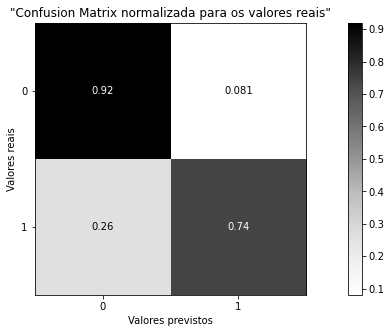

In [6]:
plot_confusion_matrix(clf,x_teste,y_teste,values_format='.2g',normalize='true',cmap='Greys')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.title('"Confusion Matrix normalizada para os valores reais"')

In [7]:
def prever(arr):
    arr=scaler.transform([arr])
    resultado=clf.predict(arr)[0]
    if resultado==0:
        print('Tá okay.')
    else:
        print('Vai morrer ein.')

In [8]:
prever([90,1,981,0,30,0,136000,1.1,137,1,0,11])

Vai morrer ein.


In [9]:
prever([65,0,224,1,50,0,149000,1.3,137,1,1,72])

Tá okay.


__Prevendo com dados inventados__

In [10]:
from sklearn.datasets import make_blobs

x,y=make_blobs(n_samples=500, centers=2,n_features=2,random_state=0)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [12]:
#treinando a máquina 

clf=svm.SVC()
clf.fit(x_train,y_train)

#testando o modelo

y_predi=clf.predict(x_test)
print('Score F1 =',f1_score(y_test,y_predi))
print('Acurácia =',accuracy_score(y_test,y_predi))

Score F1 = 0.970873786407767
Acurácia = 0.97


Text(0.5, 1.0, '"Confusion Matrix normalizada para os valores reais"')

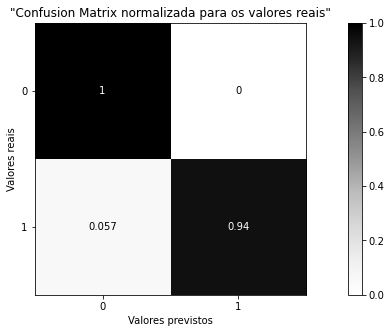

In [13]:
plot_confusion_matrix(clf,x_test,y_test,values_format='.2g',normalize='true',cmap='Greys')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.title('"Confusion Matrix normalizada para os valores reais"')